# Data Exploration

## classifications_MIT.csv

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Namespace       869 non-null    object
 1   Incident ID     869 non-null    int64 
 2   Published       869 non-null    bool  
 3   Risk Domain     869 non-null    object
 4   Risk Subdomain  869 non-null    object
 5   Entity          869 non-null    object
 6   Timing          869 non-null    object
 7   Intent          869 non-null    object
dtypes: bool(1), int64(1), object(6)
memory usage: 48.5+ KB
None

First few rows:
  Namespace  Incident ID  Published  \
0       MIT            1       True   
1       MIT            2       True   
2       MIT            3       True   
3       MIT            4       True   
4       MIT            5       True   

                                      Risk Domain  \
0                  1. Discrimination and Toxicity   
1  7. AI system saf

<Figure size 1500x1000 with 0 Axes>

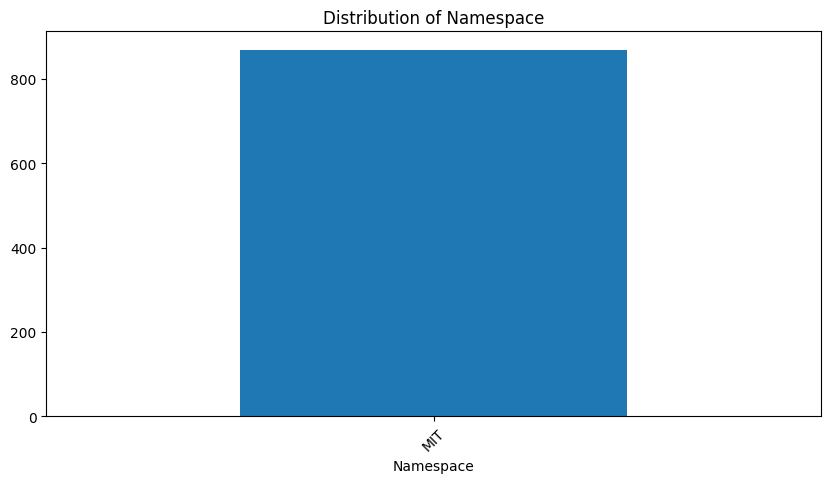


Value counts for Risk Domain:
Risk Domain
7. AI system safety, failures, and limitations    270
1. Discrimination and Toxicity                    200
4. Malicious Actors & Misuse                      157
3. Misinformation                                  92
2. Privacy & Security                              70
5. Human-Computer Interaction                      58
6. Socioeconomic & Environmental Harms             22
Name: count, dtype: int64


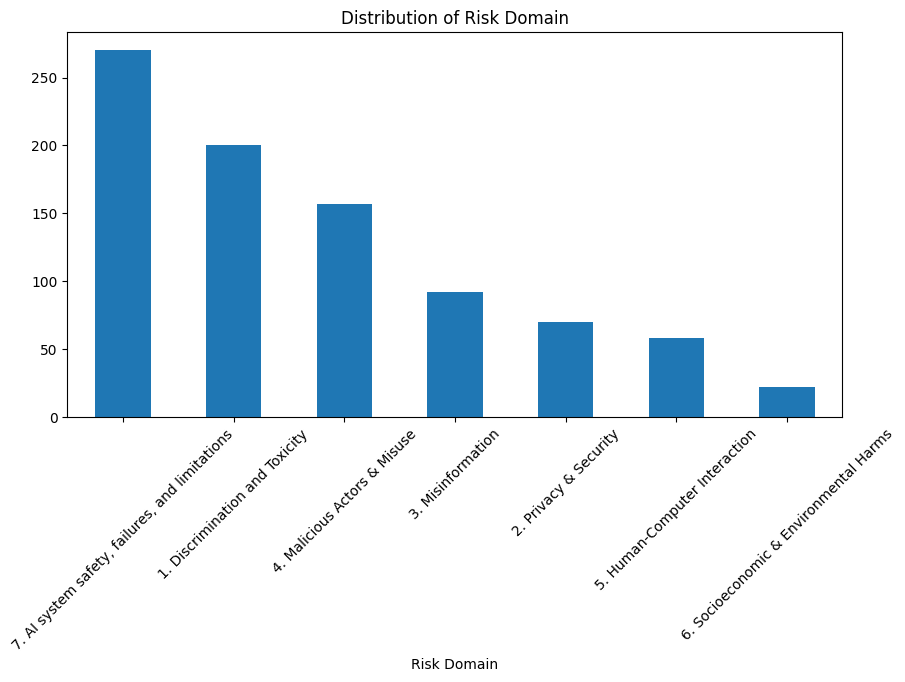


Value counts for Risk Subdomain:
Risk Subdomain
7.3. Lack of capability or robustness                                                            252
1.1. Unfair discrimination and misrepresentation                                                 116
4.3. Fraud, scams, and targeted manipulation                                                     105
3.1. False or misleading information                                                              88
1.2. Exposure to toxic content                                                                    56
2.1. Compromise of privacy by obtaining, leaking or correctly inferring sensitive information     52
4.1. Disinformation, surveillance, and influence at scale                                         50
5.1. Overreliance and unsafe use                                                                  45
1.3. Unequal performance across groups                                                            28
2.2. AI system security vulnerabilities an

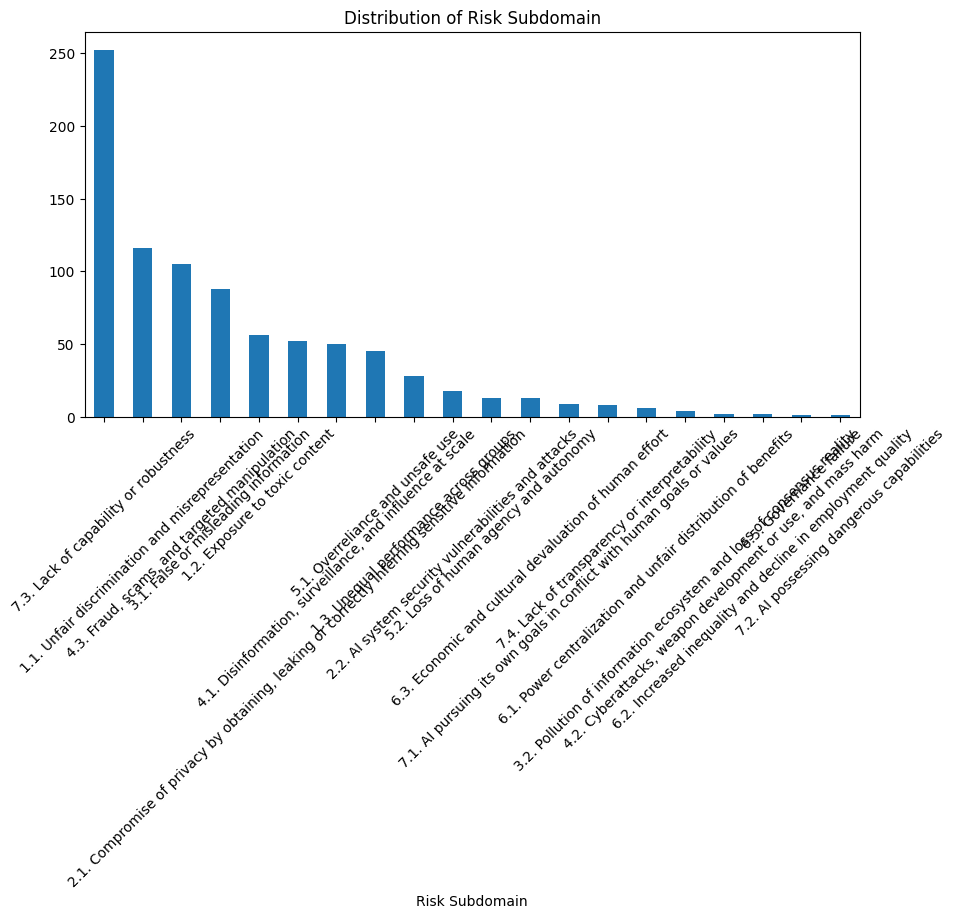


Value counts for Entity:
Entity
AI       490
Human    375
Other      4
Name: count, dtype: int64


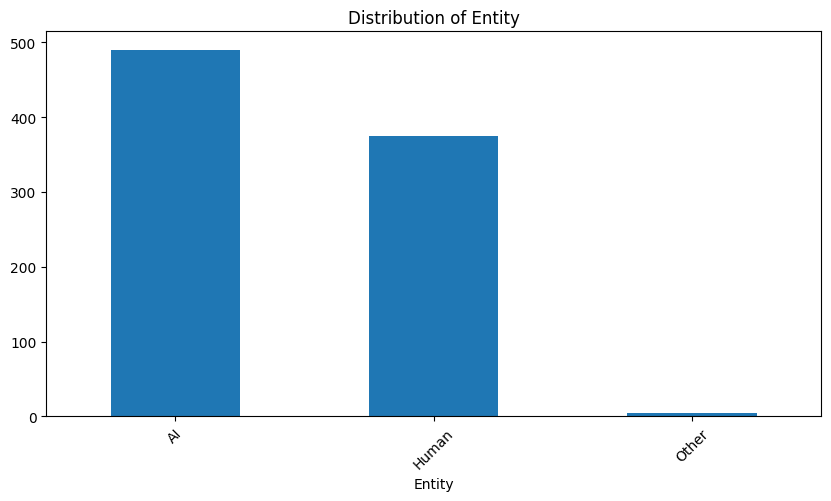


Value counts for Timing:
Timing
Post-deployment    838
Pre-deployment      31
Name: count, dtype: int64


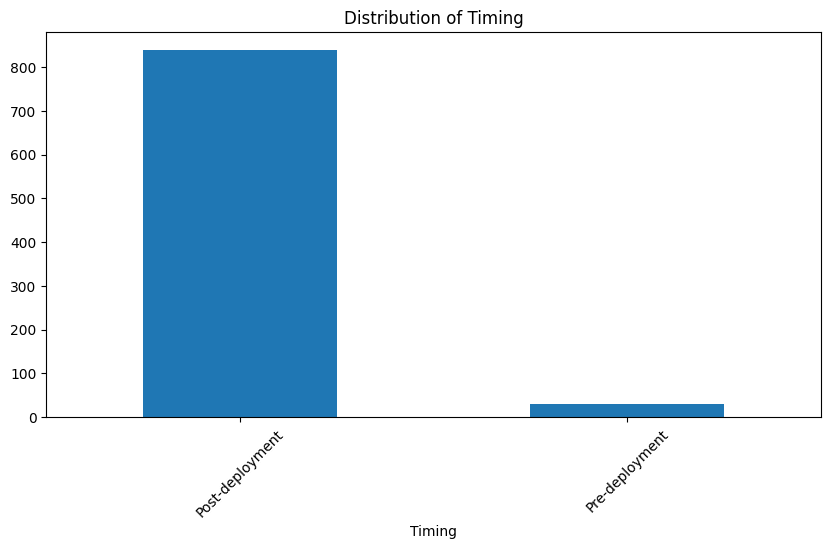


Value counts for Intent:
Intent
Unintentional    507
Intentional      362
Name: count, dtype: int64


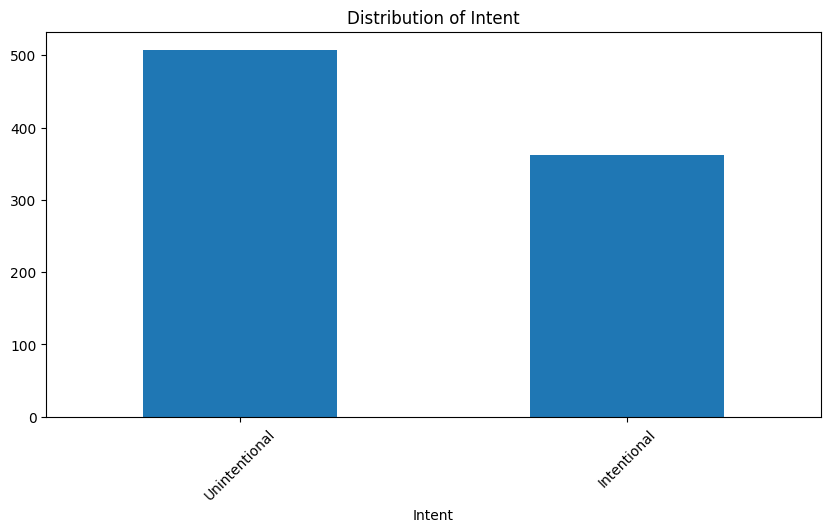

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('data/classifications_MIT.csv')

# Basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# Statistical summary
print("\nStatistical Summary:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Create visualizations
plt.figure(figsize=(15, 10))

# Value counts for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())
    
    # Bar plot for categorical variables
    plt.figure(figsize=(10, 5))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

## incident.csv

Basic information about incidents dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   _id                                      1238 non-null   object
 1   incident_id                              1238 non-null   int64 
 2   date                                     1238 non-null   object
 3   reports                                  1238 non-null   object
 4   Alleged deployer of AI system            1238 non-null   object
 5   Alleged developer of AI system           1238 non-null   object
 6   Alleged harmed or nearly harmed parties  1238 non-null   object
 7   description                              1238 non-null   object
 8   title                                    1238 non-null   object
dtypes: int64(1), object(8)
memory usage: 87.2+ KB
None

First few rows:
                   

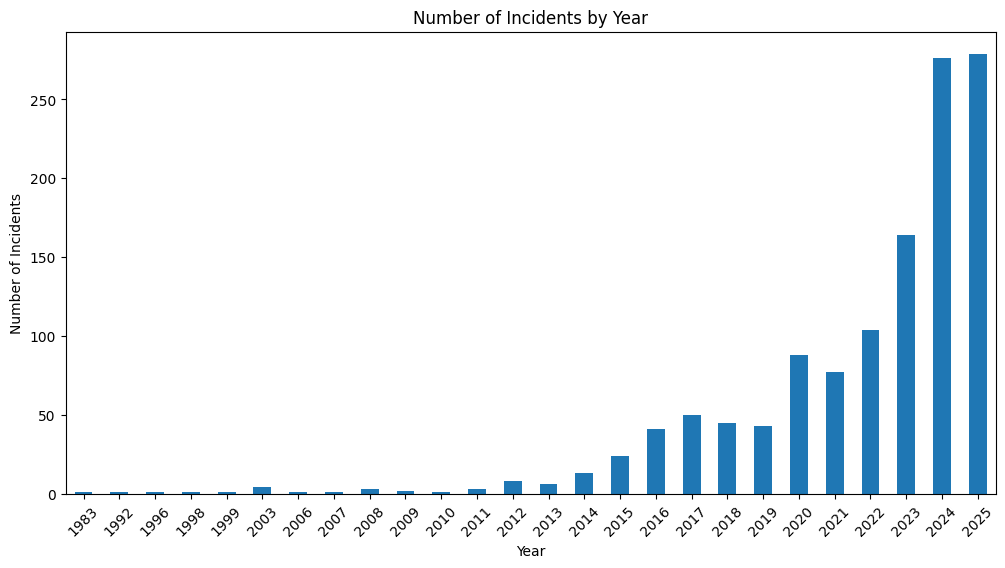


Top 10 Alleged Deployers:
scammers              63
unknown-scammers      58
openai                56
google                55
facebook              54
fraudsters            45
unknown-fraudsters    43
tesla                 43
meta                  38
microsoft             28
Name: count, dtype: int64

Top 10 Alleged Developers:
unknown-deepfake-technology-developer         180
openai                                        123
unknown-voice-cloning-technology-developer    109
unknown                                        92
google                                         74
facebook                                       53
unknown-deepfake-technology-developers         49
tesla                                          48
meta                                           43
microsoft                                      36
Name: count, dtype: int64


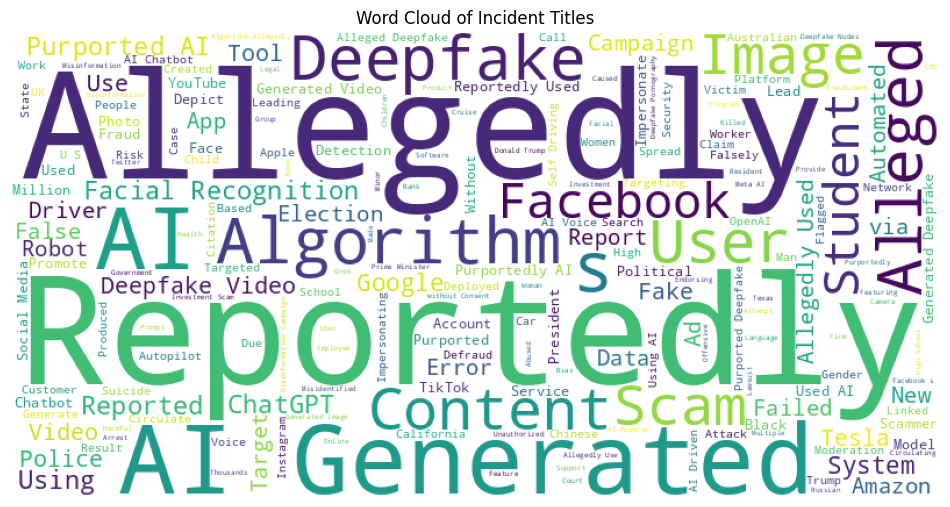

In [7]:
from wordcloud import WordCloud

# Read the incidents CSV file
incidents_df = pd.read_csv('data/incidents.csv')
# Load and explore incidents data
print("Basic information about incidents dataset:")
print(incidents_df.info())
print("\nFirst few rows:")
print(incidents_df.head())

# Convert date column to datetime if not already
incidents_df['date'] = pd.to_datetime(incidents_df['date'])

# Time series analysis
print("\nDate range:")
print(f"Earliest incident: {incidents_df['date'].min()}")
print(f"Latest incident: {incidents_df['date'].max()}")

# Number of incidents per year
yearly_incidents = incidents_df.groupby(incidents_df['date'].dt.year).size()
plt.figure(figsize=(12, 6))
yearly_incidents.plot(kind='bar')
plt.title('Number of Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

# Top deployers and developers
print("\nTop 10 Alleged Deployers:")
deployers = eval(incidents_df['Alleged deployer of AI system'].iloc[0])
for row in incidents_df['Alleged deployer of AI system']:
    deployers.extend(eval(row))
print(pd.Series(deployers).value_counts().head(10))

print("\nTop 10 Alleged Developers:")
developers = eval(incidents_df['Alleged developer of AI system'].iloc[0])
for row in incidents_df['Alleged developer of AI system']:
    developers.extend(eval(row))
print(pd.Series(developers).value_counts().head(10))

# Word cloud of incident titles

plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400,
                     background_color='white').generate(' '.join(incidents_df['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of Incident Titles')
plt.show()

## Merge incidents with clasifications_MIT

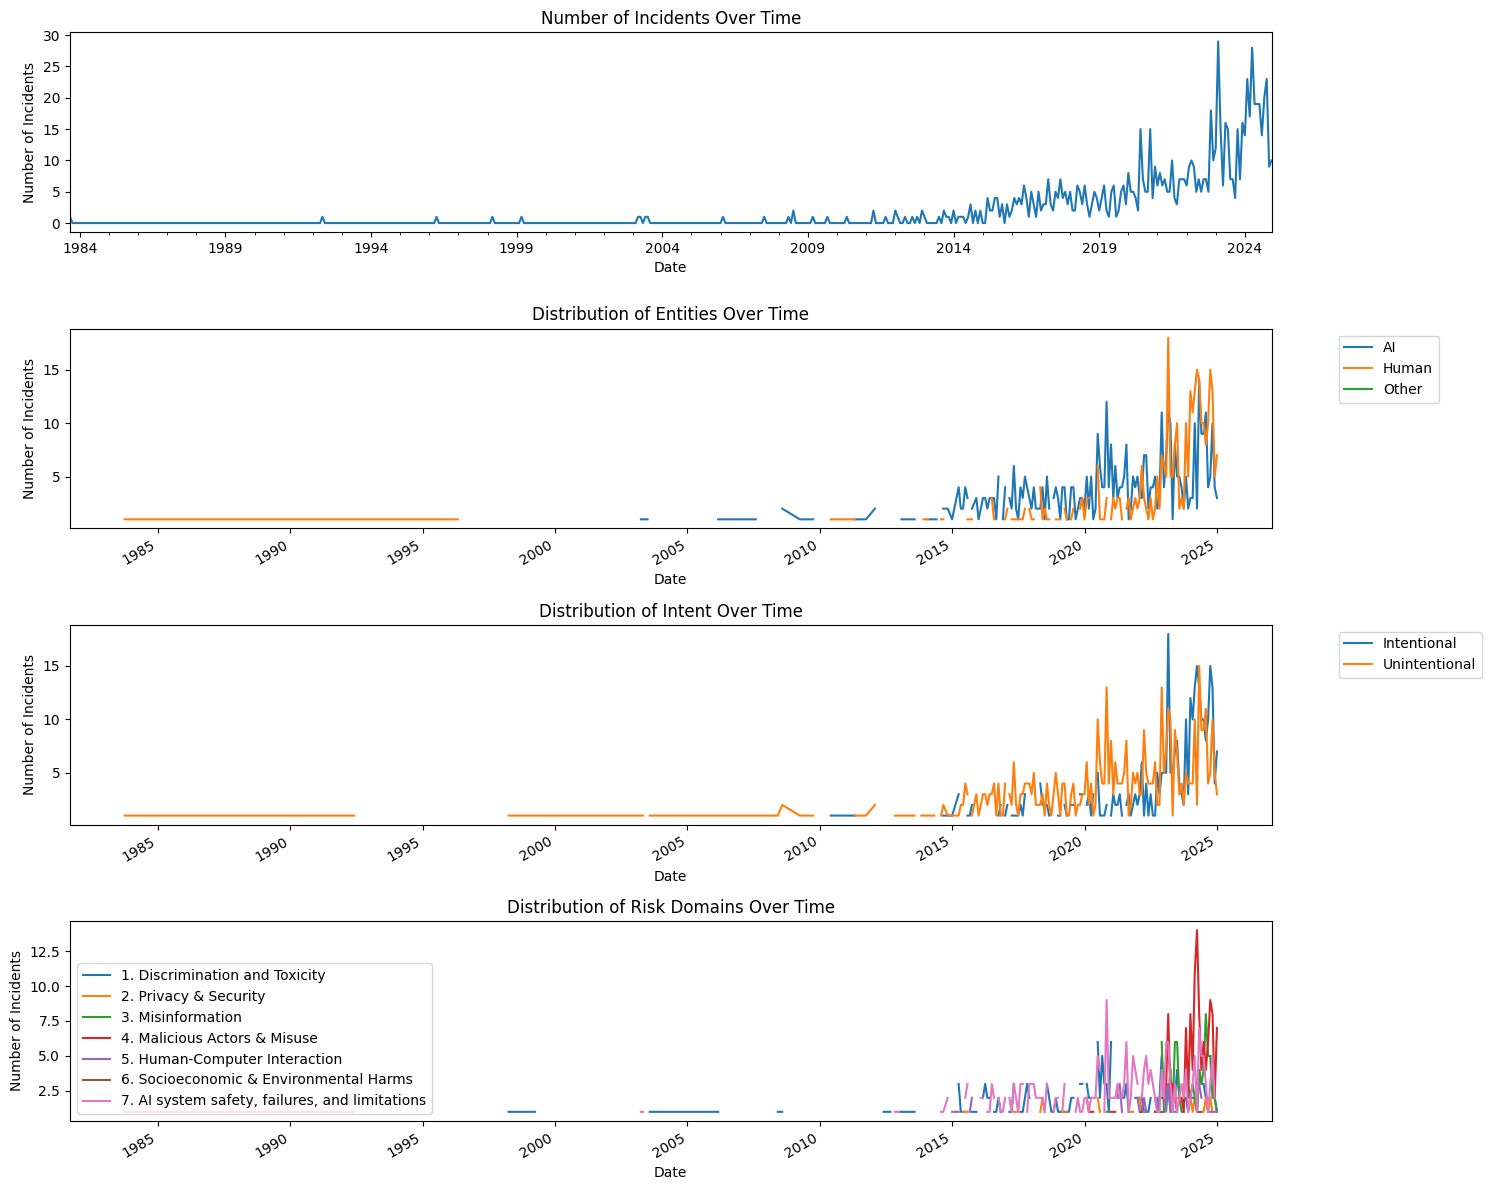

In [8]:
# Merge the dataframes
merged_df = pd.merge(df, incidents_df, left_on='Incident ID', right_on='incident_id', how='inner')

# Convert date column to datetime
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Sort by date
merged_df = merged_df.sort_values('date')

# Create additional plots
fig, axes = plt.subplots(4, 1, figsize=(15, 12))

# Plot 1: Number of incidents over time
merged_df.resample('ME', on='date').size().plot(kind='line', ax=axes[0])
axes[0].set_title('Number of Incidents Over Time')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Incidents')

# Plot 2: Entity distribution over time
entity_time = merged_df.groupby([pd.Grouper(key='date', freq='ME'), 'Entity']).size().unstack()
entity_time.plot(kind='line', stacked=False, ax=axes[1])
axes[1].set_title('Distribution of Entities Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of Incidents')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 3: Intent distribution over time
intent_time = merged_df.groupby([pd.Grouper(key='date', freq='ME'), 'Intent']).size().unstack()
intent_time.plot(kind='line', stacked=False, ax=axes[2])
axes[2].set_title('Distribution of Intent Over Time')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Number of Incidents')
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 4: Distribution of Risk Domains over time
risk_domain_time = merged_df.groupby([pd.Grouper(key='date', freq='ME'), 'Risk Domain']).size().unstack()
risk_domain_time.plot(kind='line', stacked=False, ax=axes[3])
axes[3].set_title('Distribution of Risk Domains Over Time')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Number of Incidents')
axes[3].legend( loc='lower left')

plt.tight_layout()
plt.show()

## scikit forecast

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import PoissonRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/slim/miniforge3/envs/timaeus/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


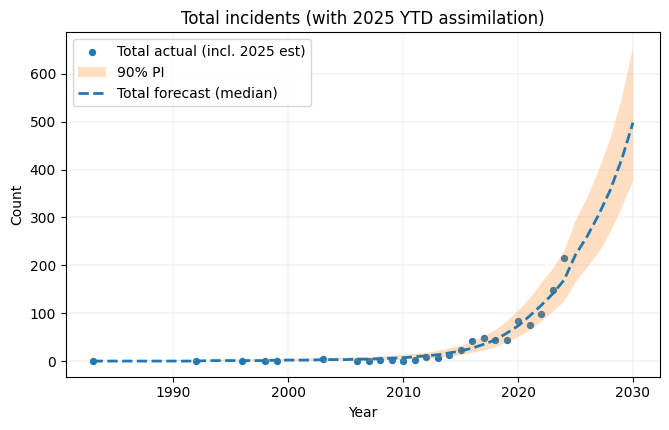

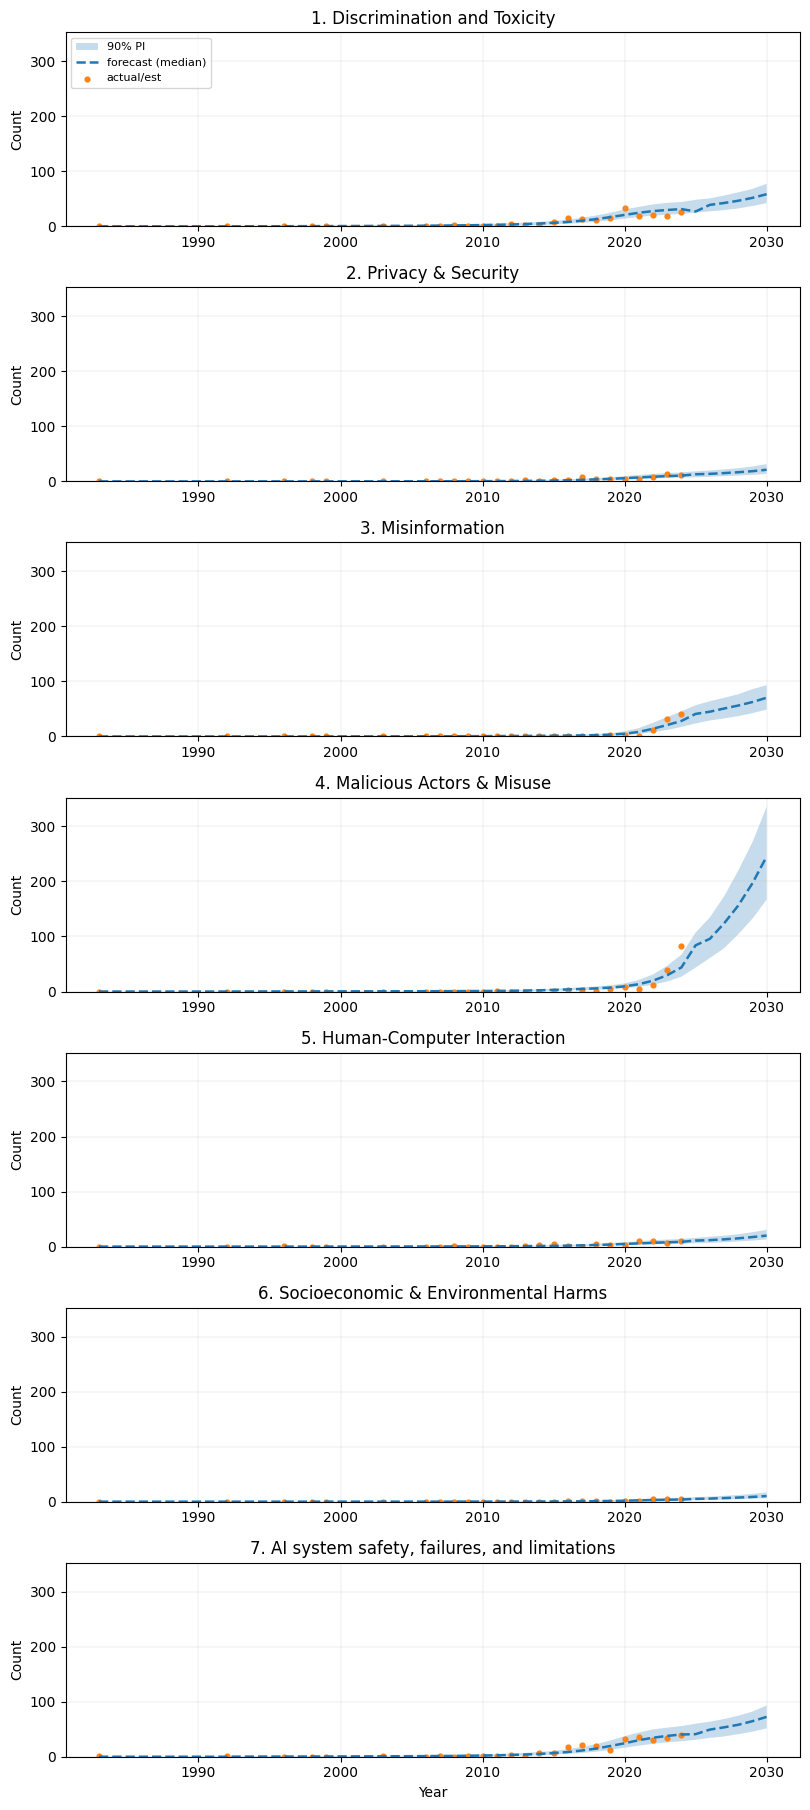


=== Summary table (2021–2024 actuals, 2025 YTD + full-year est, Pred 2026+) ===
                                                Actual_2021  Actual_2022  Actual_2023  Actual_2024  Actual_2025  Pred_2025  Pred_2026  Pred_2027  Pred_2028  Pred_2029  Pred_2030
1. Discrimination and Toxicity                           19           21           19           26         <NA>         27         39         42         46         52         58
2. Privacy & Security                                     4            8           14           12         <NA>         13         14         15         17         19         21
3. Misinformation                                         1           11           31           40         <NA>         41         45         51         56         63         70
4. Malicious Actors & Misuse                              4           11           39           83         <NA>         84         96        124        156        197        245
5. Human-Computer Interaction

In [11]:
# AI-safety incidents forecast with 2025 YTD assimilation
# - Uses monthly data in 2025 to improve the forecast
# - Annualizes 2025 YTD by historical monthly seasonality (ratio-to-average)
# - Keeps surge-aware shares, monotone totals, hard continuity (no dips), and coherent categories
# - Summary table shows Actual 2021–2024, Actual_2025_YTD, Est_2025_Full, and Pred_2026+

# =====================
# CONFIG
# =====================
B_SIM = 1000
RANDOM_SEED = 42

# Share blending / dominance control
TAU_YEARS = 5.0
W_HIST_MAX = 0.5
W_UNIF_MAX = 0.2

# Surge handling
RECENT_WIN = 4
CAT_BOOST_SURGE = 3.0
SHRINK_SURGE = 0.3

# Growth allocation constraints
GROWTH_FLOOR_FRAC = 0.05
MIN_ABS_GROWTH    = 1e-6
MOM_TILT_MAX      = 0.3
MOM_TAU           = 5.0

# Spline / GLM controls
MAX_KNOTS_TOTAL  = 8
MAX_KNOTS_SHARES = 10
ALPHA_TOTAL      = 1.0

# YTD assimilation
YTD_YEAR = 2025            # current partial year
YTD_METHOD = "ratio_to_average"  # annualization method
YTD_MIN_SHARE = 0.35       # lower bound on seasonal cum share up to current month

# Strict continuity floors for first forecast year beyond last OBSERVED/EST year
FIRST_YEAR_TOTAL_MIN_INC = 1.0
FIRST_YEAR_CAT_MIN_INC   = 1.0

# =====================
# IMPORTS
# =====================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import PoissonRegressor, LogisticRegression
from sklearn.isotonic import IsotonicRegression

# =====================
# ASSUMPTIONS
# =====================
# `merged_df` exists with columns: 'date' (datetime-like), 'Risk Domain' (category label).

declare_failure = False
try:
    merged_df['date'] = pd.to_datetime(merged_df['date'])
except Exception:
    print("ERROR: merged_df not found or 'date' invalid. Define merged_df before running.")
    declare_failure = True

if not declare_failure:

    # ============== Helpers ==============
    def make_features(n_knots, degree=3, extrap="linear"):
        return ColumnTransformer([
            ("spline", SplineTransformer(n_knots=n_knots, degree=degree, extrapolation=extrap), [0]),
            ("linear", "passthrough", [0]),
        ])

    def scale_years(year_array, center):
        return ((np.asarray(year_array) - center) / 10.0).reshape(-1, 1)

    def allocate_growth(total_vec, raw_mat, floor_frac=0.05, min_abs=1e-6,
                        mom_weights=None, mom_tilt_max=0.3, mom_tau=5.0,
                        years=None, last_train=None):
        T, K = raw_mat.shape
        out = np.zeros_like(raw_mat, dtype=float)
        out[0] = np.maximum(raw_mat[0], 1e-9)
        out[0] *= total_vec[0] / max(out[0].sum(), 1e-12)
        tiny = 1e-12
        for t in range(1, T):
            prev = out[t-1]
            T_prev, T_now = prev.sum(), total_vec[t]
            G = max(T_now - T_prev, 0.0)
            if G > 0:
                per_cat_floor = max(min_abs, floor_frac * G / raw_mat.shape[1])
                total_floor = per_cat_floor * raw_mat.shape[1]
                if total_floor > G:
                    per_cat_floor *= (G / total_floor)
            else:
                per_cat_floor = min_abs
            baseline = prev + per_cat_floor
            S_base = baseline.sum()
            if S_base > T_now:
                shrink = (S_base - T_now) / raw_mat.shape[1]
                per_cat_floor = max(0.0, per_cat_floor - shrink)
                baseline = prev + per_cat_floor
                S_base = baseline.sum()
            remaining = T_now - S_base
            shares_t = raw_mat[t] / max(raw_mat[t].sum(), 1e-12)
            if mom_weights is not None and years is not None and last_train is not None:
                h = max(0.0, years[t] - last_train)
                tilt = mom_tilt_max * (1.0 - np.exp(-h / mom_tau))
                shares_t = (1.0 - tilt) * shares_t + tilt * mom_weights
            alloc = remaining * shares_t if remaining > 0 else np.zeros_like(prev)
            c = baseline + alloc
            resid = c.sum() - T_now
            if abs(resid) > 1e-10:
                j = np.argmax(c - prev)
                c[j] -= resid
                c[j] = max(c[j], prev[j] + tiny)
            c = np.maximum(c, prev + tiny)
            out[t] = c
        return out

    # ============== 0) Build monthly + annual actuals; YTD 2025 annualization ==============
    df = merged_df.copy()
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    cats_all = df['Risk Domain'].astype('category').cat.categories

    # Annual totals (wide)
    actual_by_year_full = (
        df.assign(one=1)
          .groupby(['year','Risk Domain'])['one']
          .sum()
          .unstack('Risk Domain')
          .reindex(columns=cats_all)
          .fillna(0.0)
    )

    # Monthly totals (wide)
    actual_by_ym = (
        df.assign(one=1)
          .groupby([pd.Grouper(key='date', freq='MS'), 'Risk Domain'])['one']
          .sum()
          .unstack('Risk Domain')
          .reindex(columns=cats_all)
          .fillna(0.0)
    )
    actual_by_ym['year'] = actual_by_ym.index.year
    actual_by_ym['month'] = actual_by_ym.index.month

    # Determine last observed month in YTD_YEAR
    ytd_mask = (actual_by_ym['year'] == YTD_YEAR)
    months_obs = sorted(actual_by_ym.loc[ytd_mask, 'month'].unique().tolist())
    have_ytd = len(months_obs) > 0
    last_month = max(months_obs) if have_ytd else None

    # Historical monthly seasonal profile (total and per-category)
    # Use years strictly before YTD_YEAR
    hist_monthly = actual_by_ym[actual_by_ym['year'] < YTD_YEAR].copy()
    monthly_total = hist_monthly[cats_all].sum(axis=1)
    hist_monthly['total'] = monthly_total

    # Average cumulative share up to month m
    def avg_cum_share_up_to(m, series):
        if series.empty:
            return np.nan
        s = series.copy()
        s = s.groupby([s.index.year, s.index.month]).sum().unstack(1).fillna(0.0)
        # s: rows=years, cols=month 1..12
        cum = s.cumsum(axis=1)
        tot = s.sum(axis=1).replace(0, np.nan)
        shares = (cum.div(tot, axis=0)).mean(axis=0)  # average across years
        return float(shares.get(m, np.nan))

    if have_ytd:
        total_series_hist = hist_monthly.set_index(hist_monthly.index)["total"]
        cum_share_total = avg_cum_share_up_to(last_month, total_series_hist)
        if not np.isfinite(cum_share_total) or cum_share_total < YTD_MIN_SHARE:
            cum_share_total = YTD_MIN_SHARE

        # YTD totals
        ytd_total = actual_by_ym.loc[(actual_by_ym['year']==YTD_YEAR) & (actual_by_ym['month']<=last_month), cats_all].sum(axis=1).sum()
        est_total_2025 = ytd_total / max(cum_share_total, 1e-9)

        # Per-category cumulative shares (use same total share to avoid extreme noise)
        # Alternative: category-specific cum shares; here we keep it simple and robust
        ytd_cats = actual_by_ym.loc[(actual_by_ym['year']==YTD_YEAR) & (actual_by_ym['month']<=last_month), cats_all].sum()
        # Use 2024 category shares as baseline for distributing the remainder beyond YTD
        if (YTD_YEAR-1) in actual_by_year_full.index:
            base_shares = actual_by_year_full.loc[YTD_YEAR-1]
            if base_shares.sum() > 0:
                base_shares = (base_shares / base_shares.sum()).values
            else:
                base_shares = np.full(len(cats_all), 1.0/len(cats_all))
        else:
            base_shares = np.full(len(cats_all), 1.0/len(cats_all))

        # Compose category full-year estimates: keep YTD counts already observed, add projected remainder by baseline shares
        remainder = max(est_total_2025 - ytd_cats.sum(), 0.0)
        est_cats_2025 = (ytd_cats.values + remainder * base_shares)
        est_cats_2025 = np.maximum(est_cats_2025, 0.0)

        # Insert 2025 estimates into annual table for modeling continuity/momentum
        actual_by_year_full.loc[YTD_YEAR, cats_all] = est_cats_2025

    # ============== 1) Totals: annualize, fit Poisson GAM, enforce strictly increasing ==============
    annual_total = actual_by_year_full.sum(axis=1).rename('total').to_frame()
    years_hist = np.sort(annual_total.index.values)
    if years_hist.size < 2:
        raise ValueError("Need at least two years of data.")
    t_mean = years_hist.mean()
    n_knots_total = max(3, min(MAX_KNOTS_TOTAL, np.unique(years_hist).size))
    X_hist_total = scale_years(years_hist, t_mean)
    total_model = Pipeline([
        ("features", make_features(n_knots_total, degree=3, extrap="linear")),
        ("glm", PoissonRegressor(alpha=ALPHA_TOTAL, max_iter=5000))
    ])
    total_model.fit(X_hist_total, annual_total.loc[years_hist, 'total'].values)

    # ============== 2) Shares: surge-aware multinomial with recency + YTD year ==============
    last_year = int(years_hist.max())
    long = actual_by_year_full.stack().rename('count').reset_index().rename(columns={'level_1':'Risk Domain'})
    long = long[long['year'].between(int(years_hist.min()), int(years_hist.max()))]

    # Recency boosts, with extra weight for YTD year if present
    win = min(RECENT_WIN, max(1, len(years_hist)))
    recency_w = np.where(long['year'] >= (last_year - win + 1), np.exp((long['year'] - (last_year - win + 1)) / 1.5), 1.0)
    if have_ytd and (long['year'] == YTD_YEAR).any():
        recency_w = np.where(long['year'] == YTD_YEAR, recency_w*1.5, recency_w)

    # Surge boost from recent share slope (recomputed on annual table including 2025 est)
    hist_table = actual_by_year_full.reindex(columns=cats_all)
    hist_tot = hist_table.sum(axis=1).replace(0, np.nan)
    hist_shares_all = (hist_table.T / hist_tot).T.fillna(0.0)
    if hist_shares_all.shape[0] >= 2:
        share_slope = (hist_shares_all.iloc[-1] - hist_shares_all.iloc[max(-win, -hist_shares_all.shape[0])]) / max(1, (min(win, hist_shares_all.shape[0]-1)))
    else:
        share_slope = pd.Series(0.0, index=hist_shares_all.columns)
    slope_thresh = np.quantile(share_slope, 0.75) if len(share_slope) > 0 else 0.0
    surge_mask = (share_slope > slope_thresh) & (hist_shares_all.iloc[-1] > 0.05)

    def boost_for(cat):
        return CAT_BOOST_SURGE if surge_mask.get(cat, False) else 1.0

    cat_w = long['Risk Domain'].map(lambda c: boost_for(c)).astype(float).values
    w_cls_adj = long['count'].values * recency_w * cat_w

    n_knots_shares = max(4, min(MAX_KNOTS_SHARES, np.unique(long['year']).size))
    X_share = scale_years(long['year'].values, t_mean)
    y_cls = long['Risk Domain'].values

    share_model = make_pipeline(
        SplineTransformer(n_knots=n_knots_shares, degree=3, extrapolation="linear"),
        LogisticRegression(multi_class='multinomial', C=1.0, max_iter=5000, solver="lbfgs")
    )
    share_model.fit(X_share, y_cls, logisticregression__sample_weight=w_cls_adj)
    cats = share_model.named_steps['logisticregression'].classes_
    K = len(cats)

    # Historical average shares for blending
    avg_hist_share = hist_shares_all.reindex(columns=cats).mean(axis=0).values
    avg_hist_share = np.maximum(avg_hist_share, 1e-12); avg_hist_share /= avg_hist_share.sum()

    # Momentum weights from recent share slopes
    mom_raw = np.maximum(share_slope.reindex(cats).fillna(0.0).values, 0.0)
    mom_w = np.full(K, 1.0 / K) if mom_raw.sum() == 0 else mom_raw / mom_raw.sum()

    # ============== 3) Forecast horizon (start after last_year) ==============
    year_start = int(years_hist.min())
    year_end   = 2031  # extend one more year; forecasts start after last_year
    years_fore = np.arange(year_start, year_end)
    T = len(years_fore)
    X_fore = scale_years(years_fore, t_mean)

    total_raw = total_model.predict(X_fore)
    iso_total = IsotonicRegression(increasing=True, y_min=1e-8)
    total_fore = iso_total.fit_transform(years_fore, total_raw)
    for t in range(1, T):
        if total_fore[t] <= total_fore[t-1]:
            total_fore[t] = total_fore[t-1] + 1e-9

    # Hard continuity for totals: ensure first forecast year > last_year total
    y0 = int(last_year) + 1
    if (last_year in actual_by_year_full.index) and (y0 in years_fore):
        last_actual_total = float(actual_by_year_full.loc[last_year].sum())
        idx0 = int(np.where(years_fore == y0)[0][0])
        if total_fore[idx0] < last_actual_total + FIRST_YEAR_TOTAL_MIN_INC:
            shift = (last_actual_total + FIRST_YEAR_TOTAL_MIN_INC) - total_fore[idx0]
            total_fore[idx0:] = total_fore[idx0:] + shift

    # Share forecasts
    proba = share_model.predict_proba(X_fore)
    proba = np.maximum(proba, 1e-12)
    proba = proba / proba.sum(axis=1, keepdims=True)

    shrink_vec = np.array([SHRINK_SURGE if boost_for(c) > 1.0 else 1.0 for c in cats])
    horizons = np.maximum(0, years_fore - last_year).astype(float)
    w_fac = 1.0 - np.exp(-horizons / TAU_YEARS)
    uniform_share = np.full(K, 1.0 / K)

    proba_blend = np.empty_like(proba)
    for t in range(T):
        w_hist_t = W_HIST_MAX * w_fac[t] * shrink_vec
        w_unif_t = W_UNIF_MAX * w_fac[t] * shrink_vec
        w_model_t = 1.0 - (w_hist_t + w_unif_t)
        w_model_t = np.clip(w_model_t, 0.0, None)
        tw = w_model_t + w_hist_t + w_unif_t
        tw = np.where(tw <= 0, 1.0, tw)
        w_model_t /= tw; w_hist_t /= tw; w_unif_t /= tw
        p = w_model_t * proba[t] + w_hist_t * avg_hist_share + w_unif_t * uniform_share
        p = np.maximum(p, 1e-12)
        proba_blend[t] = p / p.sum()

    # ============== 4) Constrained simulations for 90% PI + median line ==============
    def draw_overdispersed_poisson(mean_vec, phi, rng):
        if phi <= 0:
            return rng.poisson(lam=mean_vec)
        g = rng.gamma(shape=max(1e-6, 1.0/phi), scale=phi, size=mean_vec.shape)
        lam_tilde = mean_vec * g
        return rng.poisson(lam=np.clip(lam_tilde, 1e-12, None))

    SHARE_KAPPA = 30.0
    GROWTH_NB_PHI = 0.3
    rng = np.random.default_rng(RANDOM_SEED)

    T = len(years_fore)
    K = len(cats)
    cats_sim = np.empty((B_SIM, T, K), dtype=float)

    growth_mean = np.empty(T)
    growth_mean[0] = total_fore[0]
    growth_mean[1:] = np.diff(total_fore)

    for b in range(B_SIM):
        growth_draws = draw_overdispersed_poisson(growth_mean, GROWTH_NB_PHI, rng)
        total_sim = np.cumsum(growth_draws).astype(float)
        for t in range(1, T):
            if total_sim[t] <= total_sim[t-1]:
                total_sim[t] = total_sim[t-1] + 1e-9
        # Dirichlet shares per year around proba_blend
        p_draw = np.empty((T, K), dtype=float)
        for t in range(T):
            alpha = np.maximum(1e-8, SHARE_KAPPA * proba_blend[t])
            p_draw[t] = rng.dirichlet(alpha)
        raw_guidance = total_sim[:, None] * p_draw
        cats_sim[b] = allocate_growth(total_sim, raw_guidance,
                                      floor_frac=GROWTH_FLOOR_FRAC, min_abs=MIN_ABS_GROWTH,
                                      mom_weights=None if horizons.max()==0 else (mom_w),
                                      mom_tilt_max=MOM_TILT_MAX, mom_tau=MOM_TAU,
                                      years=years_fore, last_train=last_year)

    q_lo, q_hi, q_med = 0.05, 0.95, 0.50
    lo_k = np.quantile(cats_sim, q_lo, axis=0)
    hi_k = np.quantile(cats_sim, q_hi, axis=0)
    med_k = np.quantile(cats_sim, q_med, axis=0)

    fore_df = pd.DataFrame(med_k, index=years_fore, columns=cats)
    fore_lo = pd.DataFrame(lo_k, index=years_fore, columns=cats)
    fore_hi = pd.DataFrame(hi_k, index=years_fore, columns=cats)

    # Coherent total from sims
    tot_sim = cats_sim.sum(axis=2)
    fore_total = pd.Series(np.quantile(tot_sim, q_med, axis=0), index=years_fore, name='Total')
    fore_total_lo = pd.Series(np.quantile(tot_sim, q_lo, axis=0), index=years_fore)
    fore_total_hi = pd.Series(np.quantile(tot_sim, q_hi, axis=0), index=years_fore)

    # ============== 4b) Strict continuity for categories at first forecast year after last_year ==============
    tiny = 1e-12
    y0 = int(last_year) + 1
    if (last_year in actual_by_year_full.index) and (y0 in fore_df.index):
        prev_vec = actual_by_year_full.reindex(columns=cats).loc[last_year].values.astype(float)
        cat_min_inc = np.where(prev_vec >= 1.0, FIRST_YEAR_CAT_MIN_INC, tiny)
        base = prev_vec + cat_min_inc
        need = base.sum()
        if float(fore_total.loc[y0]) < need:
            delta = need - float(fore_total.loc[y0])
            idx0 = int(np.where(years_fore == y0)[0][0])
            fore_total.loc[y0:] = fore_total.loc[y0:] + delta
            fore_total_lo.loc[y0:] = fore_total_lo.loc[y0:] + delta
            fore_total_hi.loc[y0:] = fore_total_hi.loc[y0:] + delta
        Tt = float(fore_total.loc[y0])
        rem = max(0.0, Tt - base.sum())
        shares_y0 = proba_blend[int(np.where(years_fore == y0)[0][0])]
        shares_y0 = shares_y0 / shares_y0.sum()
        c0 = base + rem * shares_y0
        fore_df.loc[y0] = c0
        prev = c0
        for yy in [yy for yy in fore_df.index if yy > y0]:
            cc = np.maximum(fore_df.loc[yy].values.astype(float), prev + tiny)
            Tt = float(fore_total.loc[yy])
            S = cc.sum()
            scale = 1.0 if S == 0 else (Tt / S)
            cc = cc * scale
            fore_df.loc[yy] = cc
            prev = cc

    # ============== 5) Plotting ==============
    # Actuals per year (from annual table)
    actual_total = actual_by_year_full.sum(axis=1)

    # Identify 2025 YTD actuals for annotation
    ytd_actual_total = None
    if have_ytd:
        ytd_actual_total = actual_by_ym.loc[(actual_by_ym['year']==YTD_YEAR) & (actual_by_ym['month']<=last_month), cats_all].sum(axis=1).sum()

    # Total panel
    plt.figure(figsize=(6.8, 4.4))
    ax = plt.gca()
    ax.scatter(actual_total.index, actual_total.values, s=18, label="Total actual (incl. 2025 est)")
    if ytd_actual_total is not None:
        ax.scatter([YTD_YEAR], [ytd_actual_total], s=28, marker='x', label=f"{YTD_YEAR} YTD actual (m≤{last_month})")
    ax.fill_between(years_fore, fore_total_lo.values, fore_total_hi.values, alpha=0.25, label="90% PI")
    ax.plot(fore_total.index, fore_total.values, '--', lw=2, label="Total forecast (median)")
    ax.set_title("Total incidents (with 2025 YTD assimilation)")
    ax.set_xlabel("Year"); ax.set_ylabel("Count")
    ax.legend(); ax.grid(True, lw=0.3, alpha=0.5)
    plt.tight_layout(); plt.show()

    # Category subplots: one row per category, shared y-limits
    cats = list(cats)
    K = len(cats)
    # Compute global y-lims including 2025 est + PI
    ymins, ymaxs = [], []
    for c in cats:
        series_list = [
            fore_lo[c].values,
            fore_hi[c].values,
            fore_df[c].values,
            actual_by_year_full[c].values,
        ]
        vals = np.concatenate([arr[~np.isnan(arr)] for arr in series_list if np.size(arr) > 0])
        if vals.size > 0:
            ymins.append(vals.min()); ymaxs.append(vals.max())
    ymin = max(0.0, (min(ymins) if ymins else 0.0))
    ymax = max(ymaxs) if ymaxs else (ymin + 1.0)
    pad = 0.05 * (ymax - ymin if ymax > ymin else 1.0)
    ymin_plot = max(0.0, ymin - pad); ymax_plot = ymax + pad

    import math
    n_rows = K; n_cols = 1
    plt.figure(figsize=(8.2, max(2.6 * n_rows, 3.8)))
    for j, c in enumerate(cats):
        ax = plt.subplot(n_rows, n_cols, j+1)
        ax.fill_between(years_fore, fore_lo[c].values, fore_hi[c].values, alpha=0.25, label="90% PI")
        ax.plot(fore_df.index, fore_df[c].values, '--', lw=1.8, label="forecast (median)")
        ax.scatter(actual_by_year_full.index, actual_by_year_full[c].values, s=12, alpha=0.95, label="actual/est")
        if have_ytd:
            # Mark YTD dot at the current observed partial sum for category
            ytd_cat_val = actual_by_ym.loc[(actual_by_ym['year']==YTD_YEAR) & (actual_by_ym['month']<=last_month), c].sum()
            ax.scatter([YTD_YEAR], [ytd_cat_val], s=20, marker='x')
        ax.set_title(str(c)); ax.set_ylabel("Count"); ax.set_xlabel("Year" if j == n_rows-1 else "")
        ax.set_ylim(ymin_plot, ymax_plot); ax.grid(True, lw=0.3, alpha=0.5)
        if j == 0: ax.legend(loc="upper left", fontsize=8)
    plt.tight_layout(); plt.show()

    # ============== 6) Summary table: 2021–2024 actuals, 2025 YTD + full-year est, and predictions from 2026+ ==============
    round_decimals = 0
    actual_years = [2021, 2022, 2023, 2024]
    future_years = [y for y in years_fore if y >= (last_year + 1)]

    # Columns
    cols = [f"Actual_{y}" for y in actual_years]
    if have_ytd:
        cols += [f"Actual_{YTD_YEAR}_YTD_m\u2264{last_month}", f"Est_{YTD_YEAR}_Full"]
    else:
        cols += [f"Actual_{YTD_YEAR}"]
    # Forecast columns start AFTER last_year (which is 2025 if YTD present)
    pred_start = last_year + 1
    pred_cols = [f"Pred_{y}" for y in years_fore if y >= pred_start]
    cols += pred_cols

    summary_table = pd.DataFrame(index=list(cats) + ['Total'], columns=cols, dtype=float)

    # Fill 2021–2024 actuals
    for y in actual_years:
        if y in actual_by_year_full.index:
            summary_table.loc[cats, f"Actual_{y}"] = actual_by_year_full.reindex(columns=cats).loc[y].values
            summary_table.loc['Total', f"Actual_{y}"] = actual_by_year_full.loc[y].sum()

    # Fill 2025 YTD and 2025 full-year estimate
    if have_ytd:
        # per-category YTD
        ytd_cats = actual_by_ym.loc[(actual_by_ym['year']==YTD_YEAR) & (actual_by_ym['month']<=last_month), cats].sum()
        summary_table.loc[cats, f"Actual_{YTD_YEAR}_YTD_m\u2264{last_month}"] = ytd_cats.values
        summary_table.loc['Total', f"Actual_{YTD_YEAR}_YTD_m\u2264{last_month}"] = ytd_cats.sum()
        # per-category est full-year (from actual_by_year_full row 2025)
        summary_table.loc[cats, f"Est_{YTD_YEAR}_Full"] = actual_by_year_full.reindex(columns=cats).loc[YTD_YEAR].values
        summary_table.loc['Total', f"Est_{YTD_YEAR}_Full"] = actual_by_year_full.loc[YTD_YEAR].sum()
    else:
        if YTD_YEAR in actual_by_year_full.index:
            summary_table.loc[cats, f"Actual_{YTD_YEAR}"] = actual_by_year_full.reindex(columns=cats).loc[YTD_YEAR].values
            summary_table.loc['Total', f"Actual_{YTD_YEAR}"] = actual_by_year_full.loc[YTD_YEAR].sum()

    # Fill predictions starting the year AFTER last_year
    for y in years_fore:
        if y >= (last_year + 1):
            col = f"Pred_{y}"
            if y in fore_df.index:
                summary_table.loc[cats, col] = fore_df.loc[y].values
            if y in fore_total.index:
                summary_table.loc['Total', col] = float(fore_total.loc[y])

    # Integers for canvas
    summary_table = summary_table.astype(float).round(0).astype('Int64')

    print("\n=== Summary table (2021–2024 actuals, 2025 YTD + full-year est, Pred 2026+) ===")
    print(summary_table.to_string())

    # ============== 7) Sanity checks ==============
    # Forecasts are strictly increasing from first forecast year
    print("Totals strictly increasing from first forecast year? ", np.all(np.diff(fore_total.loc[fore_total.index >= (last_year+1)].values) >= -1e-12))
    print("Each category strictly increasing from first forecast year? ", all(np.all(np.diff(fore_df.loc[fore_df.index >= (last_year+1), c].values) >= -1e-12) for c in fore_df.columns))
    print("Max |sum(categories) - total| over forecast years: ", float(np.max(np.abs(fore_df.reindex(fore_total.index).loc[fore_total.index].sum(axis=1).values - fore_total.values))))